# Baseline 算法

动物分类教程

使用 Python 进行编程文档请参阅 https://docs.python.org/zh-cn/3/contents.html 。

使用 PyTorch 框架，下载、文档等详情参阅 https://pytorch.org/ ，具体中文文档参阅 https://www.pytorch.wiki/ 。

## 环境配置

在运行本代码前，你需要在以下选项二选一完成：本地环境配置或使用 Google Colab * <a href="https://colab.research.google.com/drive/1Lf0Y5-3gvjKKggQTf1zWrEqHYYIVp3z2#scrollTo=Omm0IoVSJ4Kw" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
完成。若你使用 Colab 可以忽略以下配置环境的过程，可直接阅读下一节。

建议你下载 Anaconda 完成虚拟环境的配置，https://www.anaconda.com ，因为在不同的项目中需要的 Python 版本、不同包的版本可能不同，因此需要不同包的管理软件。Anaconda 的使用，参阅 https://anaconda.cloud/support-center ，或 https://zhuanlan.zhihu.com/p/348120084 获得对新手更为友好的中文教程。

Colab 使用建议：你可以使用你的 Google Drive，将数据集上传至 Google Drive 后，进行挂载使用。否则需要每次会话时重复上传。Google Drive 挂载在 Colab 使用参阅 https://blog.csdn.net/aiynmimi/article/details/88238246

## 数据读入

如何读入数据？参阅 https://pytorch.org/tutorials/beginner/basics/data_tutorial.html ，我们进行对数据集的读入。
在真正读入前，我们先进行一些预处理。

In [1]:
NUM_CLASSES = 22
LABELS = [
    "ape", "bear", "bison", "cat", 
    "chicken", "cow", "deer", "dog",
    "dolphin", "duck", "eagle", "fish", 
    "horse", "lion", "lobster", "pig", 
    "rabbit", "shark", "snake", "spider", 
    "turkey", "wolf"
]
LABEL_MAP = {
    0: "ape", 1: "bear", 2: "bison", 3: "cat", 
    4: "chicken", 5: "cow", 6: "deer", 7: "dog",
    8: "dolphin", 9: "duck", 10: "eagle", 11: "fish", 
    12: "horse", 13: "lion", 14: "lobster", 
    15: "pig", 16: "rabbit", 17: "shark", 18: "snake", 
    19: "spider", 20:  "turkey", 21: "wolf"
}

你还需要把训练集进行分割，分割出 Valid 集

由于本任务数据的特殊性，可以直接使用 ImageFolder ，而不需要单独设计 Dataset 类，因此先定义 transformss, 参阅 https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html 。

In [2]:
from torchvision import transforms
import torch
train_transform = transforms.Compose(
    (
        transforms.RandomResizedCrop(176, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.RandomHorizontalFlip(),
        transforms.autoaugment.TrivialAugmentWide(interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.PILToTensor(),
        transforms.ConvertImageDtype(torch.float),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        transforms.RandomErasing(p=0.1),
        ))

test_transform = transforms.Compose((transforms.ToTensor(), transforms.Resize(232, interpolation=transforms.InterpolationMode.BILINEAR), transforms.CenterCrop(224), transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])))


自定义VisionDataset子类

In [3]:
from torchvision.datasets import VisionDataset
from typing import Any, Callable, List, Optional, Tuple
from PIL import Image
from pathlib import Path
import re
class AnimalDataset(VisionDataset):
    def __init__(self, root: str, transforms: Optional[Callable] = None, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None) -> None:
        super().__init__(root, transforms, transform, target_transform)
        data_path = Path(self.root)
        image_list = list(data_path.glob('*.png'))
        self.images = [str(i) for i in image_list]
    
    def __getitem__(self, index: int) -> Any:
        image_path = self.images[index]
        image = Image.open(image_path).convert('RGB')  # 读取到的是RGB， W, H, C
        image = self.transforms(image)   # transform转化image为：C, H, W

        label = re.sub(r'\D', "", image_path)
        return image, int(label)
    
    def __len__(self) -> int:
        return len(self.images)
    

将训练、测试集读入 DataLoader

In [4]:
import os

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

data_path = './Animals Dataset' #@param 
batch_size = 32 #@param
num_workers = 0 #@param

train_path = (os.path.join(data_path, 'train'))
test_path = (os.path.join(data_path, 'test'))
val_path = (os.path.join(data_path, 'val'))

train_dataset = ImageFolder(
    train_path,
    train_transform)
val_dataset = ImageFolder(
    val_path,
    test_transform)
test_dataset = AnimalDataset(
    test_path,
    test_transform)


随机挑选16张图片测试数据读入是否顺利

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

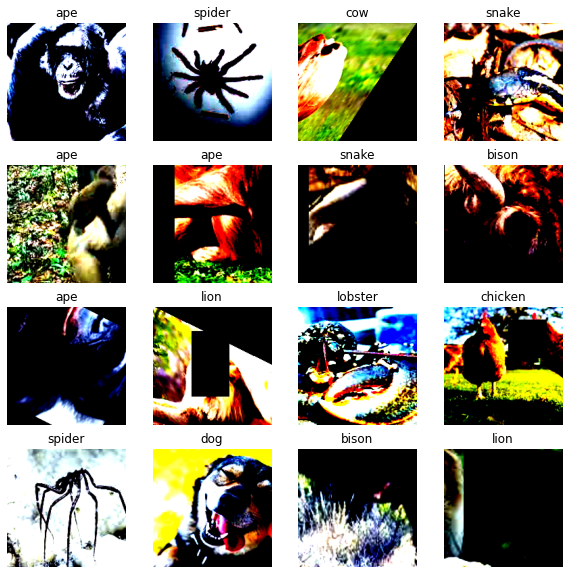

In [5]:
import matplotlib.pyplot as plt
from torch import randint
%matplotlib inline
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(LABEL_MAP[label])
    plt.axis("off")
    img = img.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    plt.imshow(img.squeeze())
plt.show()

## 建立模型

本节介绍如何定义一个模型，参阅 https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html 

先进行预处理

In [6]:
import torch
from torch import nn
from torch.nn import functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    shuffle=True)
val_loader = DataLoader(
    val_dataset,
    batch_size=len(val_dataset),
    num_workers=num_workers,
    shuffle=True)
test_loader = DataLoader(
    test_dataset,
    batch_size=1,
    num_workers=num_workers)

Using cuda device


定义模型类，注意到 PyTorch 是动态图，因此在数据进行前向传播时我们相当于已经定义了 Backpropagation 反向传播。

这样模型就可以定义为：

In [7]:
from torchvision import models
model = models.resnet50().to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

设置模型训练超参数、损失函数与优化器

In [8]:
learning_rate = 1e-2  # @param
# batch_size = 32 #@param 此处貌似在DataLoader部分定义了
epochs = 300  # @param
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=2e-5, momentum=0.9)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, verbose=True)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=30, gamma=0.1)
warmup_lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer=optimizer, start_factor=0.001, total_iters=5)
main_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer, T_max=epochs-5)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer=optimizer, schedulers=[warmup_lr_scheduler, main_scheduler], milestones=[5])


定义评价指标

In [9]:
class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self, name, fmt=':f'):
      self.name = name
      self.fmt = fmt
      self.reset()

  def reset(self):
      self.val = 0
      self.avg = 0
      self.sum = 0
      self.count = 0

  def update(self, val, n=1):
      self.val = val
      self.sum += val * n
      self.count += n
      self.avg = self.sum / self.count

  def __str__(self):
      fmtstr = '{name} {avg' + self.fmt + '}'
      return fmtstr.format(**self.__dict__)

def accuracy(output, target, topk=(1,)):
  """Computes the accuracy over the k top predictions for the specified values of k"""
  with torch.no_grad():
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

batch_time = AverageMeter('Time', ':6.3f')
data_time = AverageMeter('Data', ':6.3f')
losses = AverageMeter('Training loss', ':.4e')
top1 = AverageMeter('Acc@1', ':6.2f')
top5 = AverageMeter('Acc@5', ':6.2f')

训练

In [10]:
import time

val_loss_history = []
loss_history = []
top1_history = []
top5_history = []
best_loss = 0x7fffffff

start = time.time()
for i in range(epochs):
  for batch, (X, y) in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)
    data_time.update(time.time() - start)
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  batch_time.update(time.time() - start)
  start = time.time()

  with torch.no_grad():
    for batch, (X, y) in enumerate(val_loader):
      X = X.to(device)
      y = y.to(device)
      pred = model(X)
      val_loss = loss_fn(pred, y)
      if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        best_epoch = i
        best_model = model
      acc1, acc5 = accuracy(pred, y, topk=(1, 5))
      loss_history.append(loss.item())
      val_loss_history.append(val_loss.item())
      top1_history.append(acc1[0])
      top5_history.append(acc5[0])
      losses.update(loss.item(), X.size(0))
      top1.update(acc1[0], X.size(0))
      top5.update(acc5[0], X.size(0))
    scheduler.step()
      
  print(f"Epoch:{i + 1}: {batch_time}, {losses}, Validation loss {val_loss.item():.4e}, {top1}, {top5}, learning rate {optimizer.state_dict()['param_groups'][0]['lr']}")
  losses.reset()
  top1.reset()
  top5.reset()

print(f"Best Epoch:{best_epoch + 1}, loss: {best_loss}, Acc@1: {top1_history[best_epoch]}, Acc@5: {top5_history[best_epoch]}")


Epoch:1: Time 11.689, Training loss 6.6171e+00, Validation loss 6.6561e+00, Acc@1   0.34, Acc@5   3.77, learning rate 0.002008
Epoch:2: Time 12.643, Training loss 3.7682e+00, Validation loss 3.1775e+00, Acc@1   6.16, Acc@5  28.77, learning rate 0.004006
Epoch:3: Time 12.944, Training loss 4.8785e+00, Validation loss 3.7531e+00, Acc@1   5.48, Acc@5  27.74, learning rate 0.006004
Epoch:4: Time 12.962, Training loss 3.3280e+00, Validation loss 3.9563e+00, Acc@1   7.53, Acc@5  30.14, learning rate 0.008002


/home/nightingalecen/miniconda3/envs/LearningDeep/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch:5: Time 12.968, Training loss 3.4359e+00, Validation loss 3.0076e+00, Acc@1  17.47, Acc@5  43.15, learning rate 0.01
Epoch:6: Time 13.016, Training loss 3.3347e+00, Validation loss 2.9903e+00, Acc@1  12.33, Acc@5  43.49, learning rate 0.00999971647483124
Epoch:7: Time 13.134, Training loss 3.0738e+00, Validation loss 2.9296e+00, Acc@1  11.99, Acc@5  46.92, learning rate 0.009998865931479571
Epoch:8: Time 13.189, Training loss 3.0007e+00, Validation loss 2.8154e+00, Acc@1  13.70, Acc@5  47.95, learning rate 0.00999744846640517
Epoch:9: Time 13.231, Training loss 2.9902e+00, Validation loss 2.7005e+00, Acc@1  14.73, Acc@5  53.42, learning rate 0.009995464240362847
Epoch:10: Time 13.225, Training loss 2.8914e+00, Validation loss 2.7931e+00, Acc@1  18.49, Acc@5  46.92, learning rate 0.00999291347838381
Epoch:11: Time 13.315, Training loss 2.9405e+00, Validation loss 2.6571e+00, Acc@1  17.81, Acc@5  54.45, learning rate 0.00998979646975015
Epoch:12: Time 13.408, Training loss 2.4987e+

Epoch:64: Time 13.295, Training loss 2.6767e+00, Validation loss 1.9717e+00, Acc@1  40.41, Acc@5  78.42, learning rate 0.00904508497187473
Epoch:65: Time 13.293, Training loss 2.1884e+00, Validation loss 1.8947e+00, Acc@1  43.15, Acc@5  83.22, learning rate 0.00901355818965481
Epoch:66: Time 13.293, Training loss 2.6541e+00, Validation loss 1.8685e+00, Acc@1  41.44, Acc@5  82.88, learning rate 0.008981576229529673
Epoch:67: Time 13.289, Training loss 2.1909e+00, Validation loss 1.8560e+00, Acc@1  44.18, Acc@5  83.22, learning rate 0.008949142718575574
Epoch:68: Time 13.284, Training loss 2.2212e+00, Validation loss 1.7675e+00, Acc@1  44.18, Acc@5  83.56, learning rate 0.008916261335079178
Epoch:69: Time 13.280, Training loss 2.3155e+00, Validation loss 1.7615e+00, Acc@1  47.60, Acc@5  82.88, learning rate 0.008882935808120409
Epoch:70: Time 13.276, Training loss 2.1906e+00, Validation loss 1.9438e+00, Acc@1  41.10, Acc@5  80.14, learning rate 0.008849169917149527
Epoch:71: Time 13.276,

Epoch:123: Time 13.305, Training loss 8.9672e-01, Validation loss 1.4081e+00, Acc@1  57.88, Acc@5  88.36, learning rate 0.006545084971874735
Epoch:124: Time 13.305, Training loss 1.9387e+00, Validation loss 1.4299e+00, Acc@1  54.79, Acc@5  88.36, learning rate 0.00649435709185575
Epoch:125: Time 13.303, Training loss 2.1257e+00, Validation loss 1.4097e+00, Acc@1  59.59, Acc@5  86.64, learning rate 0.006443459736698103
Epoch:126: Time 13.305, Training loss 1.4785e+00, Validation loss 1.3945e+00, Acc@1  57.53, Acc@5  89.04, learning rate 0.006392398678674277
Epoch:127: Time 13.308, Training loss 1.7151e+00, Validation loss 1.4263e+00, Acc@1  54.79, Acc@5  86.64, learning rate 0.006341179708622311
Epoch:128: Time 13.310, Training loss 1.8607e+00, Validation loss 1.3917e+00, Acc@1  54.79, Acc@5  87.33, learning rate 0.006289808635289056
Epoch:129: Time 13.313, Training loss 1.5072e+00, Validation loss 1.3922e+00, Acc@1  58.22, Acc@5  88.36, learning rate 0.006238291284671405
Epoch:130: Tim

Epoch:182: Time 13.230, Training loss 1.4342e+00, Validation loss 1.1538e+00, Acc@1  67.81, Acc@5  90.75, learning rate 0.0034549150281252593
Epoch:183: Time 13.228, Training loss 1.0354e+00, Validation loss 1.2221e+00, Acc@1  65.07, Acc@5  88.01, learning rate 0.003404362376297234
Epoch:184: Time 13.226, Training loss 1.2021e+00, Validation loss 1.1842e+00, Acc@1  65.75, Acc@5  88.36, learning rate 0.003353990685839824
Epoch:185: Time 13.224, Training loss 1.0409e+00, Validation loss 1.2704e+00, Acc@1  62.67, Acc@5  89.38, learning rate 0.003303805669409845
Epoch:186: Time 13.223, Training loss 1.1234e+00, Validation loss 1.1315e+00, Acc@1  64.38, Acc@5  89.38, learning rate 0.0032538130184933986
Epoch:187: Time 13.221, Training loss 1.0580e+00, Validation loss 1.1444e+00, Acc@1  66.78, Acc@5  90.75, learning rate 0.0032040184027603983
Epoch:188: Time 13.220, Training loss 1.2915e+00, Validation loss 1.2047e+00, Acc@1  63.70, Acc@5  90.75, learning rate 0.003154427469421577
Epoch:189:

Epoch:240: Time 13.131, Training loss 5.2517e-01, Validation loss 1.1222e+00, Acc@1  64.04, Acc@5  90.75, learning rate 0.0009864418103451816
Epoch:241: Time 13.130, Training loss 8.9721e-01, Validation loss 1.1059e+00, Acc@1  65.75, Acc@5  90.07, learning rate 0.0009549150281252622
Epoch:242: Time 13.129, Training loss 9.3489e-01, Validation loss 1.1207e+00, Acc@1  65.41, Acc@5  90.07, learning rate 0.0009238469992650628
Epoch:243: Time 13.126, Training loss 1.1319e+00, Validation loss 1.0809e+00, Acc@1  67.47, Acc@5  89.38, learning rate 0.0008932412471918317
Epoch:244: Time 13.124, Training loss 6.0141e-01, Validation loss 1.0929e+00, Acc@1  67.47, Acc@5  90.07, learning rate 0.0008631012429059799
Epoch:245: Time 13.122, Training loss 1.0017e+00, Validation loss 1.1022e+00, Acc@1  65.07, Acc@5  90.75, learning rate 0.0008334304045874248
Epoch:246: Time 13.120, Training loss 1.1430e+00, Validation loss 1.1053e+00, Acc@1  68.15, Acc@5  90.07, learning rate 0.0008042320972079449
Epoch:

Epoch:298: Time 13.059, Training loss 7.1750e-01, Validation loss 1.1004e+00, Acc@1  68.84, Acc@5  90.41, learning rate 1.134068520429742e-06
Epoch:299: Time 13.058, Training loss 5.4693e-01, Validation loss 1.1003e+00, Acc@1  68.84, Acc@5  90.41, learning rate 2.8352516875940177e-07
Epoch:300: Time 13.057, Training loss 5.7927e-01, Validation loss 1.1003e+00, Acc@1  68.84, Acc@5  90.41, learning rate 0.0
Best Epoch:254, loss: 1.0715221166610718, Acc@1: 69.17808532714844, Acc@5: 90.41095733642578


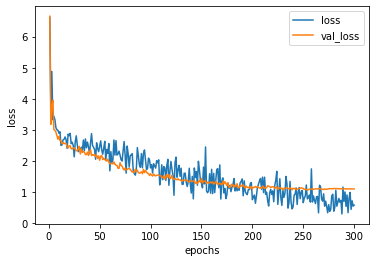

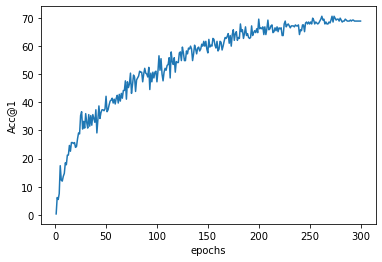

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
plt.plot(np.arange(1, epochs+1), loss_history, label="loss")
plt.plot(np.arange(1, epochs+1), val_loss_history, label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
#plt.savefig("loss.png")
plt.show()
plt.clf()
plt.plot(np.arange(1, epochs+1), [i.item() for i in top1_history])
plt.xlabel("epochs")
plt.ylabel("Acc@1")
#plt.savefig("Acc.png")
plt.show()
plt.clf()

由于模型过于简单，因此训练准确率不高。你可以尝试训练其它的模型（甚至于预训练模型，但预训练模型如何进行训练也是一个值得讨论的问题）。
同时，这里并没有使用 Valid 集来进行评价，而是使用了 train 集，你可以尝试加入 Valid 集（如提前分割，或用其他方式等）



# 输出结果

输出结果非常简单，与训练类似，但模型不能更新参数

In [12]:
#model = torch.load('./ResNet34_8.30_1700.pt')

In [13]:
import numpy as np
def test(model, test_image, name_prefix):
  model.eval()
  labels = []
  image_numbers = []
  with torch.no_grad():
    for _, (images, label) in enumerate(test_image):
      images = images.to(device)
      y = model(images)
      batch_labels = torch.argmax(y, dim=1)
      labels.append(batch_labels)
      image_numbers.append(label)
  ans = torch.cat(labels, 0).cpu().numpy()
  image_numbers = torch.cat(image_numbers, 0).cpu().numpy()
  res = {image_numbers[i]:LABEL_MAP[j] for i, j in enumerate(ans)}
  print(f"{name_prefix} model result:", res)
  return res

res = test(best_model, test_loader, "best")



best model result: {0: 'horse', 1: 'duck', 10: 'deer', 100: 'chicken', 101: 'cow', 102: 'pig', 103: 'snake', 104: 'bear', 105: 'lobster', 106: 'cow', 107: 'eagle', 108: 'bison', 109: 'turkey', 11: 'cat', 12: 'ape', 13: 'fish', 14: 'turkey', 15: 'dog', 16: 'chicken', 17: 'lion', 18: 'ape', 2: 'pig', 20: 'duck', 21: 'turkey', 22: 'shark', 23: 'dolphin', 24: 'bear', 25: 'duck', 26: 'dog', 27: 'pig', 28: 'lion', 29: 'chicken', 3: 'deer', 30: 'duck', 31: 'lobster', 32: 'chicken', 33: 'cat', 34: 'fish', 35: 'deer', 36: 'lobster', 37: 'ape', 38: 'lion', 4: 'cow', 40: 'cow', 41: 'lobster', 42: 'bear', 43: 'snake', 44: 'cat', 45: 'eagle', 46: 'rabbit', 47: 'wolf', 48: 'dog', 49: 'lobster', 5: 'shark', 50: 'shark', 51: 'snake', 52: 'chicken', 53: 'bison', 54: 'dolphin', 55: 'spider', 56: 'spider', 57: 'shark', 58: 'bison', 6: 'chicken', 60: 'snake', 61: 'lion', 62: 'spider', 63: 'horse', 64: 'cat', 65: 'spider', 66: 'lobster', 67: 'ape', 68: 'shark', 69: 'deer', 7: 'snake', 70: 'bison', 71: 'duc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

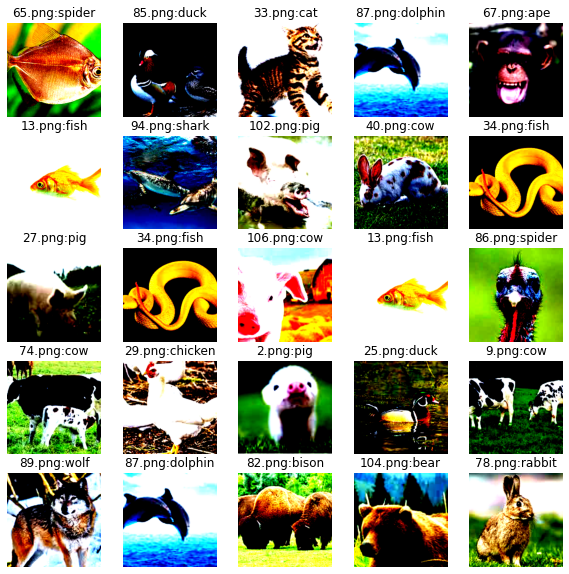

In [14]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = randint(len(test_dataset), size=(1,)).item()
    img, num = test_dataset[sample_idx]
    label = res[num]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{num}.png:{label}")
    plt.axis("off")
    img = img.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    plt.imshow(img.squeeze())
plt.show()

# 保存模型

参阅 https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

In [15]:
#网络_日期_时间.pt
import time
t = time.localtime(time.time())
torch.save(best_model, f'./ResNet50_{t[1]}.{t[2]}_{t[3]}{t[4]}.pt')

In [16]:
#model = torch.load('model.path')